Exercise 1 task 1

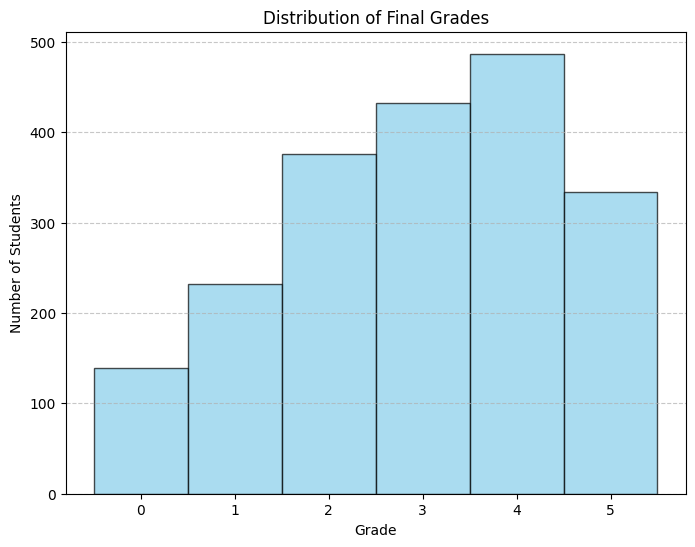

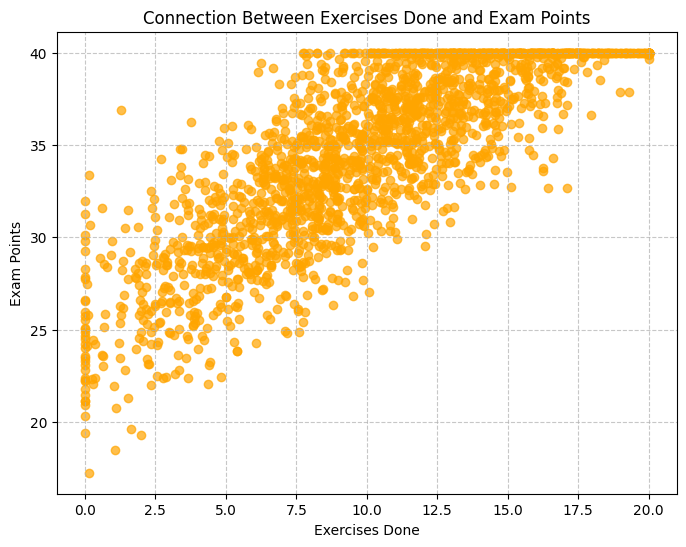

Mean of exercise points: 10.10813
Standard deviation of exercise points: 4.659659580173212
Grade 0: Mean = 1.8310791366906474, Std = 1.51760208936699
Grade 1: Mean = 4.599181034482759, Std = 1.7097503654200816
Grade 2: Mean = 7.3363297872340425, Std = 1.5564404075659979
Grade 3: Mean = 10.006388888888889, Std = 1.6470519164349673
Grade 4: Mean = 12.685030800821357, Std = 1.6404048522037007
Grade 5: Mean = 16.87395209580838, Std = 1.7757170966361806
Exercise points threshold for grade 5: 16.87395209580838
Exercise points threshold for grade 4: 12.685030800821357
Exercise points threshold for grade 0: 1.8310791366906474


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load data, skipping the first row, Skip the first row since it is the title row
with open('bogus_student_data.txt', 'r') as file:
    data = np.loadtxt(file, skiprows=1)

# Extract columns based on provided data structure
exercise_done = data[:, 0]  # Exercise points
exam_points = data[:, 1]    # Exam points
grades = data[:, 2]         # Grades

# Step 2: Visualize the distribution of final grades using histogram
plt.figure(figsize=(8, 6))
plt.hist(grades, bins=np.arange(7)-0.5, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')
plt.xticks(range(6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 3: Visualize the connection between exercises done and points earned in the exam using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(exercise_done, exam_points, color='orange', alpha=0.7)
plt.xlabel('Exercises Done')
plt.ylabel('Exam Points')
plt.title('Connection Between Exercises Done and Exam Points')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Step 4: Compute mean and standard deviation of exercise points over all observations
exercise_mean = np.mean(exercise_done)
exercise_std = np.std(exercise_done)

print("Mean of exercise points:", exercise_mean)
print("Standard deviation of exercise points:", exercise_std)

# Step 5: Compute mean and standard deviation per grade
for grade in range(6):
    grade_indices = np.where(grades == grade)[0]
    grade_exercise = exercise_done[grade_indices]
    grade_mean = np.mean(grade_exercise)
    grade_std = np.std(grade_exercise)
    print(f"Grade {grade}: Mean = {grade_mean}, Std = {grade_std}")

# Step 6: Analyze if exercise done alone can predict the grade
grade_5_threshold = np.mean(exercise_done[grades == 5])
grade_4_threshold = np.mean(exercise_done[grades == 4])
grade_0_threshold = np.mean(exercise_done[grades == 0])

print("Exercise points threshold for grade 5:", grade_5_threshold)
print("Exercise points threshold for grade 4:", grade_4_threshold)
print("Exercise points threshold for grade 0:", grade_0_threshold)


Exercise 1 task 2

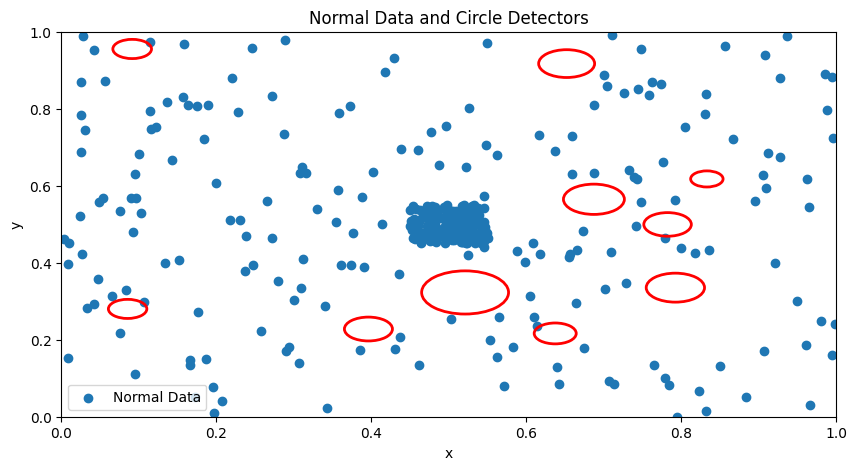

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

with open('Normal_Data.txt', 'r') as file:
    data_string = file.readlines()

# Remove the first value if it's an index and not part of the coordinates,
# and then split the rest of the line by commas
data_values = np.array([val for line in data_string for val in line.strip().split(',')[1:]], dtype=float)


# Reshape the array into two columns (x and y coordinates).
data = data_values.reshape(-1, 2).T

# Function to check if a detector covers any normal data points
def covers_data(center, radius, data_points):
    # Iterate over each point in the data_points array
    for point in data_points.T:  # Removed the transpose because data is already transposed before being passed
        if np.linalg.norm(center - point) < radius:
            return True
    return False


# Plot the normal data
plt.figure(figsize=(10,5))
plt.scatter(data[0], data[1], label='Normal Data')


# Generate circle detectors
detectors = []
num_detectors = 10
attempts = 0
max_attempts = 10000

while len(detectors) < num_detectors and attempts < max_attempts:
    attempts += 1
    radius = np.random.uniform(0.02, 0.2)
    center = np.random.uniform(radius, 1-radius, 2)

    # Check if the detector covers any normal data points
    if not covers_data(center, radius, data):
        detectors.append((center, radius))

# Add the detectors to the plot
for center, radius in detectors:
    circle = plt.Circle(center, radius, color='r', fill=False, lw=2)
    plt.gca().add_artist(circle)


plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normal Data and Circle Detectors')
plt.legend()
plt.show()
